In [1]:
import numpy as np

In [2]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [3]:
b = empty_board((6,7))

In [4]:
def other(player):
    return -player

In [27]:
def result(s, p, a):
    if a is None: print("BROKEN")
    #check if column is full
    if(s[0][a] != 0):
        print("Error: Illegal move!")
    #copy board
    board = np.copy(s)
    #find lowest row
    lowestRow=0
    for lowestRow in range(len(board)):
        #if player disc is found
        if(board[lowestRow][a]!=0):
            #place player disc one above current disc
            board[lowestRow-1][a]=p
            #return board   
            return board
    #place player disc on lowest row
    board[lowestRow][a]=p
    #return board   
    return board

In [6]:
import math


# global variables
DEBUG = 1 # 1 ... count nodes, 2 ... debug each node
COUNT = 0

def alpha_beta_search(board, cutoff = None, player = 1):
    """start the search. cutoff = None is minimax search with alpha-beta pruning."""
    global DEBUG, COUNT
    COUNT = 0

    value, move = max_value_ab(board, player, -math.inf, +math.inf, 0, cutoff)

    if DEBUG >= 1: print(f"Number of nodes searched (cutoff = {cutoff}): {COUNT}")

    return {"move": move, "value": value}

def max_value_ab(state, player, alpha, beta, depth, cutoff):
    """player's best move."""
    global DEBUG, COUNT
    COUNT += 1

    # cut off and terminal test
    terminal = False
    v = 0
    u = utility(state, player)
    if u is not None:
        v, terminal = u, True

    if((cutoff is not None and depth >= cutoff) or terminal):
        if(terminal):
            alpha, beta = v, v
        if DEBUG >= 2: print(f"stopped at {depth}: {state} term: {terminal} eval: {v} [{alpha}, {beta}]" )
        return v, None

    v, move = -math.inf, None

    # check all possible actions in the state, update alpha and return move with the largest value
    for a in actions(state):
        v2, a2 = min_value_ab(result(state, player, a), player, alpha, beta, depth + 1, cutoff)
        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta: return v, move

    return v, move

def min_value_ab(state, player, alpha, beta, depth, cutoff):
    """opponent's best response."""
    global DEBUG, COUNT
    COUNT += 1

    # cut off and terminal test
    terminal = False
    v = 0
    u = utility(state, player)
    if u is not None:
        v, terminal = u, True

    if((cutoff is not None and depth >= cutoff) or terminal):
        if(terminal):
            alpha, beta = v, v
        if DEBUG >= 2: print(f"stopped at {depth}: {state} term: {terminal} eval: {v} [{alpha}, {beta}]" )
        return v, None

    v, move = +math.inf, None

    # check all possible actions in the state, update beta and return move with the smallest value
    for a in actions(state):
        v2, a2 = max_value_ab(result(state, other(player), a), player, alpha, beta, depth + 1, cutoff)
        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha: return v, move

    return v, move

In [7]:
def check_win(state):
    """check the board and return one of 1, -1, 0 (draw), or None (for next move)"""
    #print(np.shape(state))
    height = np.shape(state)[0]
    width = np.shape(state)[1]
    for i in range(height):
        for j in range(width):
            curr = state[i][j]
            if curr == 0:
                continue
            if j + 3 < width:
                ok = True
                for k in range(3):
                    if state[i][j+k+1] != curr:
                        ok = False
                        break
                if ok:
                    return curr

            if i + 3 < height:
                ok = True
                for k in range(3):
                    if state[i+k+1][j] != curr:
                        ok = False
                        break
                if ok:
                    return curr

            if (i + 3 < height) and (j + 3 < width):
                ok = True
                for k in range(3):
                    if state[i+k+1][j+k+1] != curr:
                        ok = False
                        break
                if ok:
                    return curr

            if (i > 2) and (j + 3 < width):
                ok = True
                for k in range(3):
                    if state[i-k-1][j+k+1] != curr:
                        ok = False
                        break
                if ok:
                    return curr

    for i in range(height):
        for j in range(width):
            if state[i][j] == 0:
                return None

    return 0

In [8]:
def utility(state, player = 1):
    """check is a state is terminal and return the utility if it is. None means not a terminal mode."""
    goal = check_win(state)
    if goal == player: return +1
    if goal == 0: return 0
    if goal == other(player): return -1  # loss is failure
    return None # continue

In [28]:
def eval_fun(state, player = 1):

    # terminal state?
    u = utility(state, player)
    if u is not None: return u, True

    score = 0
    height = np.shape(state)[0]
    width = np.shape(state)[1]
    for i in range(height):
        for j in range(width):
            curr = state[i][j]
            if curr == 0:
                continue
            if j + 3 < width:
                L = 1
                for k in range(3):
                    if state[i][j+k+1] != curr:
                        break
                    L += 1
                score += curr * (L-1)*(L-1)

            if i + 3 < height:
                L = 1
                for k in range(3):
                    if state[i+k+1][j] != curr:
                        break
                    L += 1
                score += curr * (L-1)*(L-1)

            if (i + 3 < height) and (j + 3 < width):
                L = 1
                for k in range(3):
                    if state[i+k+1][j+k+1] != curr:
                        break
                    L += 1
                score += curr * (L-1)*(L-1)

            if (i > 2) and (j + 3 < width):
                L = 1
                for k in range(3):
                    if state[i-k-1][j+k+1] != curr:
                        break
                    L += 1
                score += curr * (L-1)*(L-1)

    return score, False

In [10]:
def alpha_beta_search_eval(board, cutoff = None, player = 1):
    """start the search. cutoff = None is minimax search with alpha-beta pruning."""
    global DEBUG, COUNT
    COUNT = 0

    value, move = max_value_ab_eval(board, player, -math.inf, +math.inf, 0, cutoff)

    if DEBUG >= 1: print(f"Number of nodes searched (cutoff = {cutoff}): {COUNT}")

    return {"move": move, "value": value}


def max_value_ab_eval(state, player, alpha, beta, depth, cutoff):
    """player's best move."""
    global DEBUG, COUNT
    COUNT += 1

    # cut off and terminal test
    v, terminal = eval_fun(state, player)
    if((cutoff is not None and depth >= cutoff) or terminal):
        if(terminal):
            alpha, beta = v, v
        if DEBUG >= 2: print(f"stopped at {depth}: {state} term: {terminal} eval: {v} [{alpha}, {beta}]" )
        return v, None

    v, move = -math.inf, None

    # check all possible actions in the state, update alpha and return move with the largest value
    for a in actions(state):
        v2, a2 = min_value_ab_eval(result(state, player, a), player, alpha, beta, depth + 1, cutoff)
        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta: return v, move

    return v, move

def min_value_ab_eval(state, player, alpha, beta, depth, cutoff):
    """opponent's best response."""
    global DEBUG, COUNT
    COUNT += 1

    # cut off and terminal test
    v, terminal = eval_fun(state, player)
    if((cutoff is not None and depth >= cutoff) or terminal):
        if(terminal):
            alpha, beta = v, v
        if DEBUG >= 2: print(f"stopped at {depth}: {state} term: {terminal} eval: {v} [{alpha}, {beta}]" )
        return v, None

    v, move = +math.inf, None

    # check all possible actions in the state, update beta and return move with the smallest value
    for a in actions(state):
        v2, a2 = max_value_ab_eval(result(state, other(player), a), player, alpha, beta, depth + 1, cutoff)
        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha: return v, move

    return v, move

In [11]:
def actions(board):
    """return possible actions as a vector ot column indices"""
    result = []
    for i in range(np.shape(board)[1]):
        if board[np.shape(board)[0]-1][i] == 0:
            result.append(i)
    return result

In [12]:
def result1(state, player, action):
    """Add move to the board."""
    state = state.copy()
    for i in range(np.shape(state)[0]-1, -1, -1):
        if state[i][action] != 0:
            state[i+1][action] = player
            return state

    state[0][action] = player
    return state

In [13]:
def alpha_beta_eval_5(board, player = 1):
    return alpha_beta_search(board, cutoff=5, player=player)["move"]

In [14]:
def alpha_beta_eval_3(board, player = 1):
    return alpha_beta_search(board, cutoff=3, player=player)["move"]

In [15]:
print(alpha_beta_eval_5(b, -1))

Number of nodes searched (cutoff = 5): 246
0


In [16]:
from environment import truly_dynamic_environment, replay

In [17]:
players = [
    {
        "algo":alpha_beta_eval_5,
        "player":1,
        "args":{
            
        }
    },
    
    {
        "algo":alpha_beta_eval_3,
        "player":-1,
        "args":{
          
        }
    },
    
    
]

In [18]:
#truly_dynamic_environment(players,size=(6,7),visual=True)

In [19]:
class Heuristic_ab_search:
    def __init__(self, player, cutoff = 5, debug=2):
        self.player= player
        self.cutoff = cutoff
        self.count = 0
        self.debug= debug # 1 ... count nodes, 2 ... debug each node
    
    def find_move(self, board):
        """start the search. cutoff = None is minimax search with alpha-beta pruning."""
        self.count = 0

        value, move = self.max_value_ab(board, -math.inf, +math.inf, 0)

        if self.debug >= 1: print(f"Number of nodes searched (cutoff = {self.cutoff}): {self.count}") 

        return {"move": move, "value": value}

    def max_value_ab(self, state, alpha, beta, depth):
        """player's best move."""
        self.count += 1

        # cut off and terminal test
        v, terminal = self.eval_fun(state, self.player)
        if((self.cutoff is not None and depth >= self.cutoff) or terminal): 
            if(terminal): 
                alpha, beta = v, v
            if self.debug >= 2: print(f"stopped at {depth}: {state} term: {terminal} eval: {v} [{alpha}, {beta}]" ) 
            return v, None

        v, move = -math.inf, None

        # check all possible actions in the state, update alpha and return move with the largest value
        for a in self.actions(state):
            v2, a2 = self.min_value_ab(self.result(state, self.player, a), alpha, beta, depth + 1)
            if v2 > v:
                v, move = v2, a
                alpha = max(alpha, v)
            if v >= beta: return v, move

        return v, move

    def min_value_ab(self, state, alpha, beta, depth):
        """opponent's best response."""
        self.count += 1

        # cut off and terminal test
        v, terminal = self.eval_fun(state, self.player)
        if((self.cutoff is not None and depth >= self.cutoff) or terminal): 
            if(terminal): 
                alpha, beta = v, v
            if self.debug >= 2: print(f"stopped at {depth}: {state} term: {terminal} eval: {v} [{alpha}, {beta}]" ) 
            return v, None

        v, move = +math.inf, None

        # check all possible actions in the state, update beta and return move with the smallest value
        for a in self.actions(state):
            v2, a2 = self.max_value_ab(self.result(state, other(self.player), a), alpha, beta, depth + 1)
            if v2 < v:
                v, move = v2, a
                beta = min(beta, v)
            if v <= alpha: return v, move
        return v, move
    
    #returns possible moves using move ordering
    def actions(self,s):
        #get not full collumns
        actions = np.where(np.array(s[0])==0)[0].tolist()
        #prioritize center columns
        priority = [1,2,3,4,3,2,1]
        priority = [priority[i] for i in actions]

        return [a for _,a in sorted(zip(priority,actions), reverse=True)]

    #updates board with move
    def result(self, s, p, a):
        #check if column is full
        if(s[0][a] != 0):
            print("Error: Illegal move!")
        #copy board
        board = np.copy(s)
        #find lowest row
        lowestRow=0
        for lowestRow in range(len(board)):
            #if player disc is found
            if(board[lowestRow][a]!=0):
                #place player disc one above current disc
                board[lowestRow-1][a]=p
                #return board   
                return board
        #place player disc on lowest row
        board[lowestRow][a]=p
        #return board   
        return board

    #checks if the board is full
    def terminal(self, s):
        #search board and check if it is full
        for i in range(len(s)):
            for j in range(len(s[0])):
                if s[i][j] ==0: return False
        return True

    #checks if a player has won
    def check_win(self, s):
        #copy board
        board = np.copy(s)
        #search board
        for i in range(len(board)):
            for j in range(len(board[0])):
                #check vertical
                if not i + 3 >= len(board) and board[i][j]  == board[i+1][j] == board[i+2][j] == board[i+3][j] !=0:
                    return board[i][j]
                #check horizontal
                if not j + 3 >= len(board[0]) and board[i][j]  == board[i][j+1] == board[i][j+2] == board[i][j+3] !=0:
                    return board[i][j]
                #check diagonal
                if not j + 3 >= len(board[0]) and not i + 3 >= len(board) and board[i][j] == board[i+1][j + 1] == board[i+2][j + 2] == board[i+3][j + 3] !=0:
                    return board[i][j]
                #check reverse diagonal
                if not j - 3 < 0 and not i + 3 >= len(board)and board[i][j] == board[i+1][j - 1] == board[i+2][j - 2] == board[i+3][j - 3] !=0:
                    return board[i][j]
        #return 0 if no winner
        return 0

    #checks for winner/tie/game not over
    def utility(self, s, player = 1):
        #check if either player won
        goal = self.check_win(s)
        if goal == player: return +1 
        if goal == other(player): return -1
        #check if board is full
        draw = self.terminal(s)
        if draw: return 0
        #if game is not over
        return None

    def check_alone(self,board, player, r, c):
        #check top left row
        if r>0 and c>0 and board[r-1][c-1]==player:
            return 0
        #check top middle row    
        if r>0 and board[r-1][c]==player:
            return 0
        #check top right row
        if r>0 and not c + 1 >= len(board[0]) and board[r-1][c+1]==player:
            return 0
        #check left
        if c>0 and board[r][c-1]==player:
            return 0
        #check right
        if not c + 1 >= len(board[0]) and board[r][c+1]==player:
            return 0
        #check bottom left row
        if not r + 1 >= len(board) and c>0 and board[r+1][c-1]==player:
            return 0
        #check bottom middle row
        if not r + 1 >= len(board) and board[r+1][c]==player:
            return 0
        #check bottom left row
        if not r + 1 >= len(board) and  not c + 1 >= len(board[0]) and board[r+1][c+1]==player:
            return 0   
        #if alone, return value based on column position
        if c==3: return .000002
        elif c==2 or c==4: return .0000012
        elif c==1 or c==5: return .0000007
        elif c==0 or c==6: return .0000004

    #TODO maybe add scores for more spaces after 2 in a row
    def eval_fun(self, board, player):

        # terminal state? aka 4 in a row
        u = self.utility(board, player)
        if u is not None: return u, True

        score = 0
        #go through board
        for r in range(len(board)):
            for c in range(len(board[0])):
    #DIAGONAL CHECK
                #check diagonal for 3 in a row
                if not r + 2 >= len(board) and not c + 2 >= len(board[0]):
                    #get row
                    row = np.array([board[r][c], board[r+1][c+1], board[r+2][c+2]])
                    #check for 3 in a row for player
                    if sum(row == player) == 3:
                        #check if before and after 3 is empty [0,1,1,1,0]
                        if (c>0 and r>0 and board[r-1][c-1]==0) and (not c + 3 >= len(board[0]) and not r + 3 >= len(board) and board[r+3][c+3]==0):
                            return player, False
                        #check if before 3 is empty [0,1,1,1]
                        elif (c>0 and r>0 and board[r-1][c-1]==0):
                            score+=.009
                        #check if after 3 is empty [1,1,1,0]
                        elif (not c + 3 >= len(board[0]) and not r + 3 >= len(board) and board[r+3][c+3]==0):
                            score+=.009           
                    #check for 3 in a row for other player       
                    elif sum(row == other(player)) == 3:
                        #check if before and after 3 is empty [0,1,1,1,0]
                        if (c>0 and r>0 and board[r-1][c-1]==0) and (not c + 3 >= len(board[0]) and not r + 3 >= len(board) and board[r+3][c+3]==0):
                            return other(player), False
                        #check if before 3 is empty [0,1,1,1]
                        elif (c>0 and r>0 and board[r-1][c-1]==0):
                            score-=.009
                        #check if after 3 is empty [1,1,1,0]
                        elif (not c + 3 >= len(board[0]) and not r + 3 >= len(board) and board[r+3][c+3]==0):
                            score-=.009    
                #check diagonal for 2 in a row
                if not r + 1 >= len(board) and not c + 1 >= len(board[0]):
                    #get row
                    row = np.array([board[r][c], board[r+1][c+1]])
                    #check for 2 in a row
                    if sum(row == player) == 2:
                        #make sure its not 3 in a row
                        if not (c>0 and r>0 and board[r-1][c-1]==player) and not (not c + 2 >= len(board[0]) and not r + 2 >= len(board) and board[r+2][c+2]==player):
                            #check if before and after 2 is empty [0,1,1,0]
                            if (c>0 and r>0 and board[r-1][c-1]==0) and (not c + 2 >= len(board[0]) and not r + 2 >= len(board) and board[r+2][c+2]==0):
                                #check if next before is same player [1,0,1,1,0]
                                if (c>1 and r>1 and board[r-2][c-2]==player):
                                    score+=.009
                                #check if next after is same player [0,1,1,0,1]
                                elif (not c + 3 >= len(board[0]) and not r + 3 >= len(board) and board[r+3][c+3]==player):
                                    score+=.009
                                else: score+=.0005
                            #check if before 2 is empty [0,1,1]
                            elif (c>0 and r>0 and board[r-1][c-1]==0):
                                #check if next before is same player [1,0,1,1]
                                if (c>1 and r>1 and board[r-2][c-2]==player):
                                    score+=.009
                                else: score+=.0001
                            #check if after 2 is empty [1,1,0]
                            elif (not c + 2 >= len(board[0]) and not r + 2 >= len(board) and board[r+2][c+2]==0):
                                #check if next after is same player [1,1,0,1]
                                if (not c + 3 >= len(board[0]) and not r + 3 >= len(board) and board[r+3][c+3]==player):
                                    score+=.009
                                else: score+=.0001   
                    #check for 2 in a row for other player
                    elif sum(row == other(player)) == 2:
                        #make sure its not 3 in a row
                        if not (c>0 and r>0 and board[r-1][c-1]==other(player)) and not (not c + 2 >= len(board[0]) and not r + 2 >= len(board) and board[r+2][c+2]==other(player)):
                            #check if before and after 2 is empty [0,1,1,0]
                            if (c>0 and r>0 and board[r-1][c-1]==0) and (not c + 2 >= len(board[0]) and not r + 2 >= len(board) and board[r+2][c+2]==0):
                                #check if next before is same player [1,0,1,1,0]
                                if (c>1 and r>1 and board[r-2][c-2]==other(player)):
                                    score-=.009
                                #check if next after is same player [0,1,1,0,1]
                                elif (not c + 3 >= len(board[0]) and not r + 3 >= len(board) and board[r+3][c+3]==other(player)):
                                    score-=.009
                                else: score-=.0005
                            #check if before 2 is empty [0,1,1]
                            elif (c>0 and r>0 and board[r-1][c-1]==0):
                                #check if next before is same player [1,0,1,1]
                                if (c>1 and r>1 and board[r-2][c-2]==other(player)):
                                    score-=.009
                                else: score-=.0001
                            #check if after 2 is empty [1,1,0]
                            elif (not c + 2 >= len(board[0]) and not r + 2 >= len(board) and board[r+2][c+2]==0):
                                #check if next after is same player [1,1,0,1]
                                if (not c + 3 >= len(board[0]) and not r + 3 >= len(board) and board[r+3][c+3]==other(player)):
                                    score-=.009
                                else: score-=.0001
    #REVERSE DIAGONAL CHECK
                #check diagonal for 3 in a row
                if not r + 2 >= len(board) and c>1:
                    #get row
                    row = np.array([board[r][c], board[r+1][c-1], board[r+2][c-2]])
                    #check for 3 in a row for player
                    if sum(row == player) == 3:
                        #check if before and after 3 is empty [0,1,1,1,0]
                        if (not c + 1 >= len(board[0]) and r>0 and board[r-1][c+1]==0) and (c>2 and not r + 3 >= len(board) and board[r+3][c-3]==0):
                            return player, False
                        #check if before 3 is empty [0,1,1,1]
                        elif (not c + 1 >= len(board[0]) and r>0 and board[r-1][c+1]==0):
                            score+=.009
                        #check if after 3 is empty [1,1,1,0]
                        elif (c>2 and not r + 3 >= len(board) and board[r+3][c-3]==0):
                            score+=.009
                    #check for 3 in a row for other player
                    elif sum(row == other(player)) == 3:
                        #check if before and after 3 is empty [0,1,1,1,0]
                        if (not c + 1 >= len(board[0]) and r>0 and board[r-1][c+1]==0) and (c>2 and not r + 3 >= len(board) and board[r+3][c-3]==0):
                            return other(player), False
                        #check if before 3 is empty [0,1,1,1]
                        elif (not c + 1 >= len(board[0]) and r>0 and board[r-1][c+1]==0):
                            score-=.009
                        #check if after 3 is empty [1,1,1,0]
                        elif (c>2 and not r + 3 >= len(board) and board[r+3][c-3]==0):
                            score-=.009  
                #check diagonal for 2 in a row
                if not r + 1 >= len(board) and c>0:
                    #get row
                    row = np.array([board[r][c], board[r+1][c-1]])
                    #check for 2 in a row
                    if sum(row == player) == 2:
                        #make sure its not 3 in a row
                        if not (not c + 1 >= len(board[0]) and r>0 and board[r-1][c+1]==player) and not (c>1 and not r + 2 >= len(board) and board[r+2][c-2]==player):
                            #check if before and after 2 is empty [0,1,1,0]
                            if (not c + 1 >= len(board[0]) and r>0 and board[r-1][c+1]==0) and (c>1 and not r + 2 >= len(board) and board[r+2][c-2]==0):
                                #check if next before is same player [1,0,1,1,0]
                                if (not c + 2 >= len(board[0]) and r>1 and board[r-2][c+2]==player):
                                    score+=.009
                                #check if next after is same player [0,1,1,0,1]
                                elif (c>2 and not r + 3 >= len(board) and board[r+3][c-3]==player):
                                    score+=.009
                                else: score+=.0005
                            #check if before 2 is empty [0,1,1]
                            elif (not c + 1 >= len(board[0]) and r>0 and board[r-1][c+1]==0):
                                #check if next before is same player [1,0,1,1]
                                if (not c + 2 >= len(board[0]) and r>1 and board[r-2][c+2]==player):
                                    score+=.009
                                else: score+=.0001
                            #check if after 2 is empty [1,1,0]
                            elif (c>1 and not r + 2 >= len(board) and board[r+2][c-2]==0):
                                #check if next after is same player [1,1,0,1]
                                if (c>2 and not r + 3 >= len(board) and board[r+3][c-3]==player):
                                    score+=.009
                                else: score+=.0001  
                    #check for 2 in a row for other player
                    elif sum(row == other(player)) == 2:
                        #make sure its not 3 in a row
                        if not (not c + 1 >= len(board[0]) and r>0 and board[r-1][c+1]==other(player)) and not (c>1 and not r + 2 >= len(board) and board[r+2][c-2]==other(player)):
                            #check if before and after 2 is empty [0,1,1,0]
                            if (not c + 1 >= len(board[0]) and r>0 and board[r-1][c+1]==0) and (c>1 and not r + 2 >= len(board) and board[r+2][c-2]==0):
                                #check if next before is same player [1,0,1,1,0]
                                if (not c + 2 >= len(board[0]) and r>1 and board[r-2][c+2]==other(player)):
                                    score-=.009
                                #check if next after is same player [0,1,1,0,1]
                                elif (c>2 and not r + 3 >= len(board) and board[r+3][c-3]==other(player)):
                                    score-=.009
                                else: score-=.0005
                            #check if before 2 is empty [0,1,1]
                            elif (not c + 1 >= len(board[0]) and r>0 and board[r-1][c+1]==0):
                                #check if next before is same player [1,0,1,1]
                                if (not c + 2 >= len(board[0]) and r>1 and board[r-2][c+2]==other(player)):
                                    score-=.009
                                else: score-=.0001
                            #check if after 2 is empty [1,1,0]
                            elif (c>1 and not r + 2 >= len(board) and board[r+2][c-2]==0):
                                #check if next after is same player [1,1,0,1]
                                if (c>2 and not r + 3 >= len(board) and board[r+3][c-3]==other(player)):
                                    score-=.009
                                else: score-=.0001
    #VERTICAL CHECK
                #check vertical for 3 in a row
                if not r + 2 >= len(board):
                    #get row
                    row = np.array([board[r][c], board[r+1][c], board[r+2][c]])
                    #check for 3 in a row for player and before 3 is empty [0,1,1,1]
                    if sum(row == player) == 3 and r>0 and board[r-1][c]==0:
                        score+=.009
                    #check for 3 in a row for other player and before 3 is empty [0,1,1,1]
                    elif sum(row == other(player)) == 3 and r>0 and board[r-1][c]==0:
                        score-=.009                              
                #check vertical for 2 in a row
                if not r + 1 >= len(board):
                    #get row
                    row = np.array([board[r][c], board[r+1][c]])
                    #check for 2 in a row
                    if sum(row == player) == 2:
                        #make sure its not 3 in a row
                        if not (r>0 and board[r-1][c]==player) and not (not r + 2 >= len(board) and board[r+2][c]==player):
                            #make sure before is empty
                            if r>0 and board[r-1][c]==0:
                                score+=.0001
                    #check for 2 in a row for other player
                    elif sum(row == other(player)) == 2:
                        #make sure its not 3 in a row
                        if not (r>0 and board[r-1][c]==other(player)) and not (not r + 2 >= len(board) and board[r+2][c]==other(player)):
                            #make sure before is empty
                            if r>0 and board[r-1][c]==0:
                                score-=.0001
    #HORIZONTAL CHECK
                #check horizontal for 3 in a row
                if not c + 2 >= len(board[0]):
                    #get row
                    row = np.array([board[r][c], board[r][c+1], board[r][c+2]])
                    #check for 3 in a row for player
                    if sum(row == player) == 3:
                        #check if before and after 3 is empty [0,1,1,1,0]
                        if (c>0 and board[r][c-1]==0) and (not c + 3 >= len(board[0]) and board[r][c+3]==0):
                            return player, False
                        #check if before 3 is empty [0,1,1,1]
                        elif (c>0 and board[r][c-1]==0):
                            score+=.009
                        #check if after 3 is empty [1,1,1,0]
                        elif (not c + 3 >= len(board[0]) and board[r][c+3]==0):
                            score+=.009           
                    #check for 3 in a row for other player       
                    elif sum(row == other(player)) == 3:
                        #check if before and after 3 is empty [0,1,1,1,0]
                        if (c>0 and board[r][c-1]==0) and (not c + 3 >= len(board[0]) and board[r][c+3]==0):
                            return other(player), False
                        #check if before 3 is empty [0,1,1,1]
                        elif (c>0 and board[r][c-1]==0):
                            score-=.009
                        #check if after 3 is empty [1,1,1,0]
                        elif (not c + 3 >= len(board[0]) and board[r][c+3]==0):
                            score-=.009          
                #check horizontal for 2 in a row
                if not c + 1 >= len(board[0]):
                    #get row
                    row = np.array([board[r][c], board[r][c+1]])
                    #check for 2 in a row
                    if sum(row == player) == 2:
                        #make sure its not 3 in a row
                        if not (c>0 and board[r][c-1]==player) and not (not c + 2 >= len(board[0]) and board[r][c+2]==player):
                            #check if before and after 2 is empty [0,1,1,0]
                            if (c>0 and board[r][c-1]==0) and (not c + 2 >= len(board[0]) and board[r][c+2]==0):
                                #check if next before is same player [1,0,1,1,0]
                                if (c>1 and board[r][c-2]==player):
                                    score+=.009
                                #check if next after is same player [0,1,1,0,1]
                                elif (not c + 3 >= len(board[0]) and board[r][c+3]==player):
                                    score+=.009
                                else: score+=.0005
                            #check if before 2 is empty [0,1,1]
                            elif (c>0 and board[r][c-1]==0):
                                #check if next before is same player [1,0,1,1]
                                if (c>1 and board[r][c-2]==player):
                                    score+=.009
                                else: score+=.0001
                            #check if after 2 is empty [1,1,0]
                            elif (not c + 2 >= len(board[0]) and board[r][c+2]==0):
                                #check if next after is same player [1,1,0,1]
                                if (not c + 3 >= len(board[0]) and board[r][c+3]==player):
                                    score+=.009
                                else: score+=.0001           
                    #check for 2 in a row for other player
                    elif sum(row == other(player)) == 2:
                        #make sure its not 3 in a row
                        if not (c>0 and board[r][c-1]==other(player)) and not (not c + 2 >= len(board[0]) and board[r][c+2]==other(player)):
                            #check if before and after 2 is empty [0,1,1,0]
                            if (c>0 and board[r][c-1]==0) and (not c + 2 >= len(board[0]) and board[r][c+2]==0):
                                #check if next before is same player [1,0,1,1,0]
                                if (c>1 and board[r][c-2]==other(player)):
                                    score-=.009
                                #check if next after is same player [0,1,1,0,1]
                                elif (not c + 3 >= len(board[0]) and board[r][c+3]==other(player)):
                                    score-=.009
                                else: score-=.0005
                            #check if before 2 is empty [0,1,1]
                            elif (c>0 and board[r][c-1]==0):
                                #check if next before is same player [1,0,1,1]
                                if (c>1 and board[r][c-2]==other(player)):
                                    score-=.009
                                else: score-=.0001
                            #check if after 2 is empty [1,1,0]
                            elif (not c + 2 >= len(board[0]) and board[r][c+2]==0):
                                #check if next after is same player [1,1,0,1]
                                if (not c + 3 >= len(board[0]) and board[r][c+3]==other(player)):
                                    score-=.009
                                else: score-=.0001
    #ALONE CHECK
                #check if square is not connected
                if board[r][c]!=0:
                    score+=self.check_alone(board, player, r, c)
                    score-=self.check_alone(board, other(player), r, c)
        #return final score
        return score, False

In [20]:
def kirk_player(board, player = 1, cutoff=6, debug=0):
    heuristic_player=Heuristic_ab_search(player=player, cutoff=cutoff, debug=debug)
    return heuristic_player.find_move(board)["move"]

In [21]:
import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

In [22]:
DEBUG = 0

def switch_player(player, p1 ,p2):
    if player == 1:
        return -1, p2
    else:
        return 1, p1

def play(p1, p2, N = 100, shape =(6,7)):
    results = {1: 0, -1: 0, 0: 0}
    for i in range(N):
        board = empty_board(shape)
        player, fun = 1, p1

        while True:
            a = fun(board, player)
            board = result(board, player, a)

            win = check_win(board)
            if win is not None:
                visualize(board)
                #if verbose: print(f"{board} winner: {win}")
                results[win] += 1
                break
                
            visualize(board)
            player, fun = switch_player(player, p1, p2)

    return results

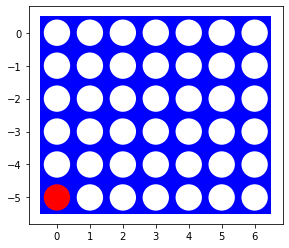

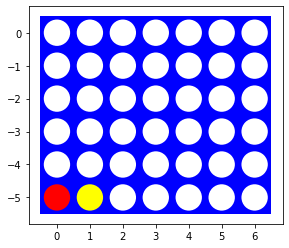

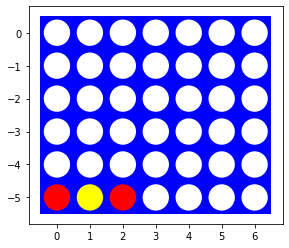

BROKEN


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [30]:
import time


%time display(play(alpha_beta_eval_3,alpha_beta_eval_5, N = 1))

In [24]:
def result(s, p, a):
    #check if column is full
    if(s[0][a] != 0):
        print("Error: Illegal move!")
    #copy board
    board = np.copy(s)
    #find lowest row
    lowestRow=0
    for lowestRow in range(len(board)):
        #if player disc is found
        if(board[lowestRow][a]!=0):
            #place player disc one above current disc
            board[lowestRow-1][a]=p
            #return board   
            return board
    #place player disc on lowest row
    board[lowestRow][a]=p
    #return board   
    return board

In [25]:
def result1(state, player, action):
    """Add move to the board."""
    state = state.copy()
    for i in range(np.shape(state)[0]-1, -1, -1):
        if state[i][action] != 0:
            state[i+1][action] = player
            return state

    state[0][action] = player
    return state

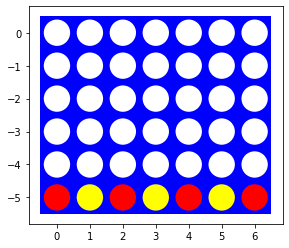

IndexError: list index out of range

In [29]:
board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [1,-1, 1,-1, 1,-1, 1]]
visualize(board)
visualize(result1(board, player=-1, action=6))